# Decision Tree: Drug Prediction Model

Simple Decision Tree to predict which drug (A, B, C, X, or Y) should be prescribed based on patient characteristics.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load and Explore Data

In [2]:
# Load dataset
df = pd.read_csv('drug.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())

print(f"\nDrug distribution:")
print(df['Drug'].value_counts())

print(f"\nFeature info:")
print(df.info())

Dataset shape: (200, 6)

First 5 rows:
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

Drug distribution:
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

Feature info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


## Data Preprocessing

In [3]:
# Encode categorical variables
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()

df['Sex_encoded'] = le_sex.fit_transform(df['Sex'])
df['BP_encoded'] = le_bp.fit_transform(df['BP'])
df['Cholesterol_encoded'] = le_chol.fit_transform(df['Cholesterol'])

print("Encoding mappings:")
print(f"Sex: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")
print(f"BP: {dict(zip(le_bp.classes_, le_bp.transform(le_bp.classes_)))}")
print(f"Cholesterol: {dict(zip(le_chol.classes_, le_chol.transform(le_chol.classes_)))}")

# Prepare features and target
features = ['Age', 'Sex_encoded', 'BP_encoded', 'Cholesterol_encoded', 'Na_to_K']
X = df[features]
y = df['Drug']

print(f"\nFeatures: {features}")
print(f"Target classes: {sorted(y.unique())}")

Encoding mappings:
Sex: {'F': np.int64(0), 'M': np.int64(1)}
BP: {'HIGH': np.int64(0), 'LOW': np.int64(1), 'NORMAL': np.int64(2)}
Cholesterol: {'HIGH': np.int64(0), 'NORMAL': np.int64(1)}

Features: ['Age', 'Sex_encoded', 'BP_encoded', 'Cholesterol_encoded', 'Na_to_K']
Target classes: ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']


## Train-Test Split and Model Training

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Create and train Decision Tree
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # Limit depth for interpretability
    min_samples_split=5,  # Prevent overfitting
    min_samples_leaf=2
)

dt_model.fit(X_train, y_train)
print("\n✅ Decision Tree model trained successfully!")

Training samples: 160
Testing samples: 40

✅ Decision Tree model trained successfully!


## Model Evaluation

In [5]:
# Make predictions
y_pred = dt_model.predict(X_test)
y_train_pred = dt_model.predict(X_train)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print("=" * 50)
print("DECISION TREE MODEL RESULTS")
print("=" * 50)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.1f}%)")
print(f"Testing Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")

# Performance assessment
if test_accuracy > 0.9:
    print("\n🎉 Excellent performance!")
elif test_accuracy > 0.8:
    print("\n✅ Very good performance!")
elif test_accuracy > 0.7:
    print("\n✅ Good performance!")
else:
    print("\n⚠️ Model needs improvement")

# Detailed classification report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

DECISION TREE MODEL RESULTS
Training Accuracy: 1.0000 (100.0%)
Testing Accuracy:  0.9750 (97.5%)

🎉 Excellent performance!

Classification Report:
              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.97      0.93      0.94        40
weighted avg       0.98      0.97      0.97        40



## Visualizations

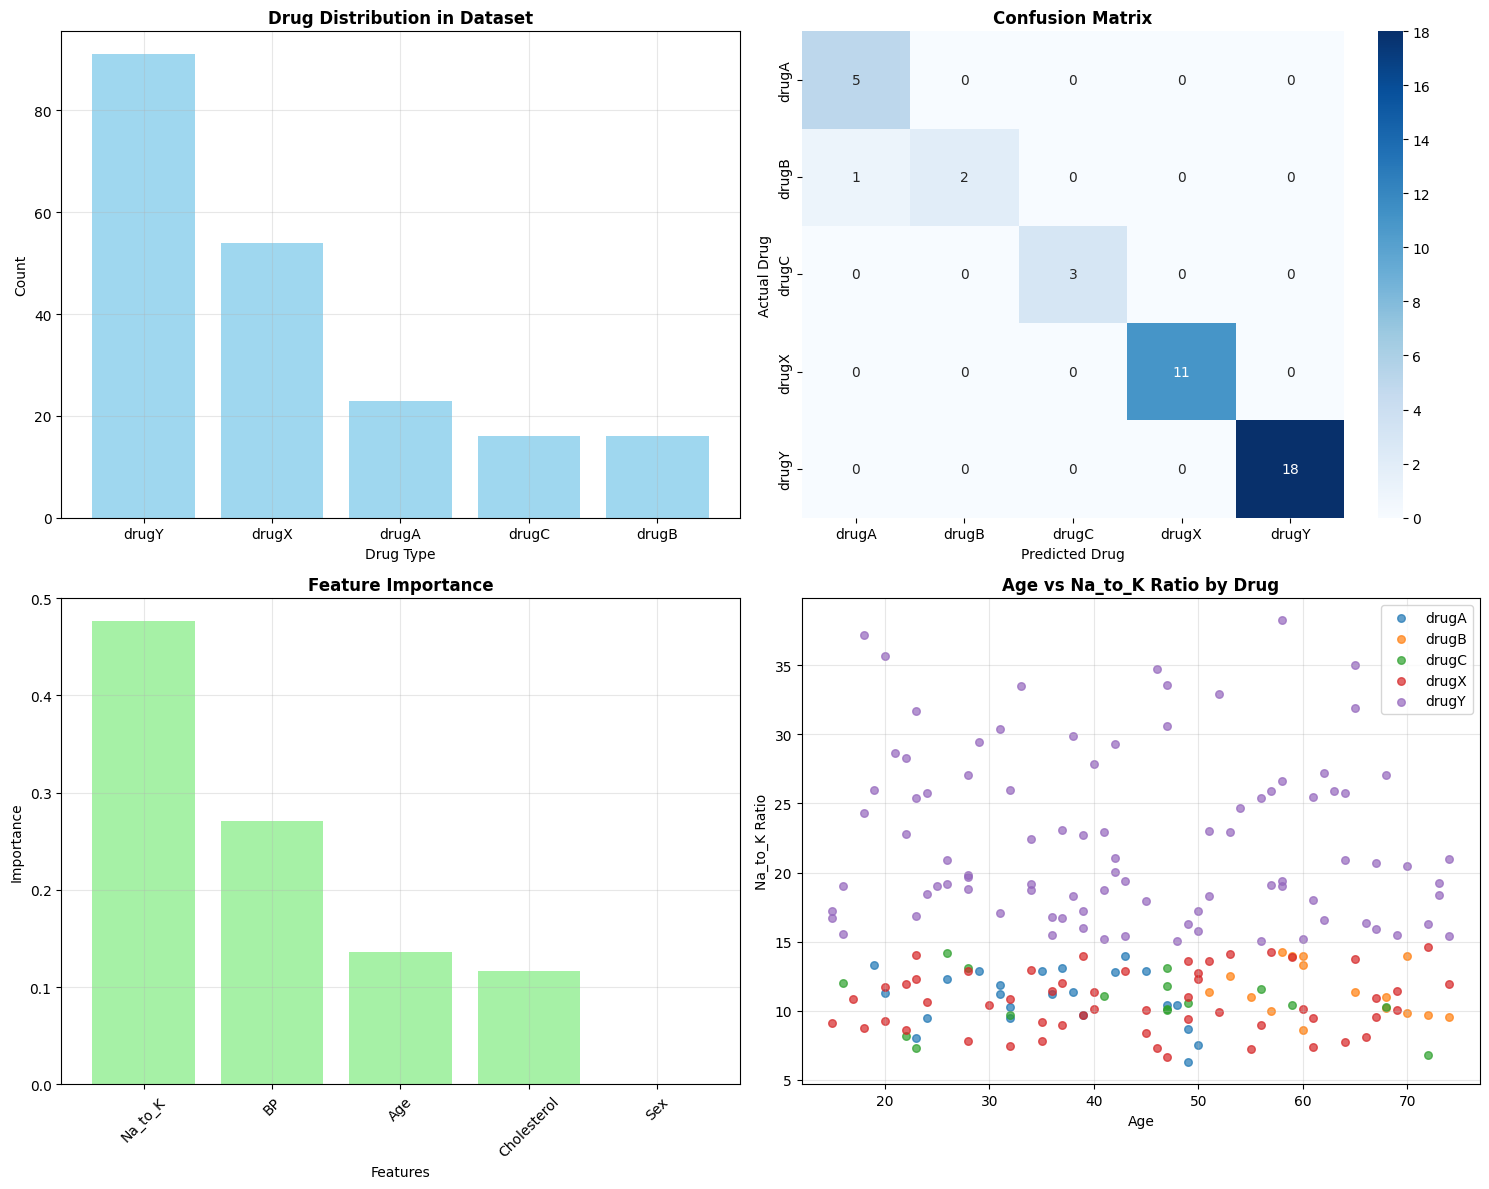


Feature Importance Ranking:
Na_to_K     : 0.4762
BP          : 0.2706
Age         : 0.1360
Cholesterol : 0.1171
Sex         : 0.0000


In [6]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Drug distribution
drug_counts = df['Drug'].value_counts()
axes[0, 0].bar(drug_counts.index, drug_counts.values, color='skyblue', alpha=0.8)
axes[0, 0].set_title('Drug Distribution in Dataset', fontweight='bold')
axes[0, 0].set_xlabel('Drug Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(True, alpha=0.3)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
drug_labels = sorted(y.unique())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=drug_labels, yticklabels=drug_labels)
axes[0, 1].set_title('Confusion Matrix', fontweight='bold')
axes[0, 1].set_xlabel('Predicted Drug')
axes[0, 1].set_ylabel('Actual Drug')

# 3. Feature Importance
feature_names = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

axes[1, 0].bar(range(len(importances)), importances[indices], color='lightgreen', alpha=0.8)
axes[1, 0].set_title('Feature Importance', fontweight='bold')
axes[1, 0].set_xlabel('Features')
axes[1, 0].set_ylabel('Importance')
axes[1, 0].set_xticks(range(len(importances)))
axes[1, 0].set_xticklabels([feature_names[i] for i in indices], rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. Age vs Na_to_K by Drug
for drug in drug_labels:
    drug_data = df[df['Drug'] == drug]
    axes[1, 1].scatter(drug_data['Age'], drug_data['Na_to_K'], 
                      label=drug, alpha=0.7, s=30)
axes[1, 1].set_title('Age vs Na_to_K Ratio by Drug', fontweight='bold')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Na_to_K Ratio')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print feature importance ranking
print("\nFeature Importance Ranking:")
for i in indices:
    print(f"{feature_names[i]:12s}: {importances[i]:.4f}")

## Decision Tree Visualization

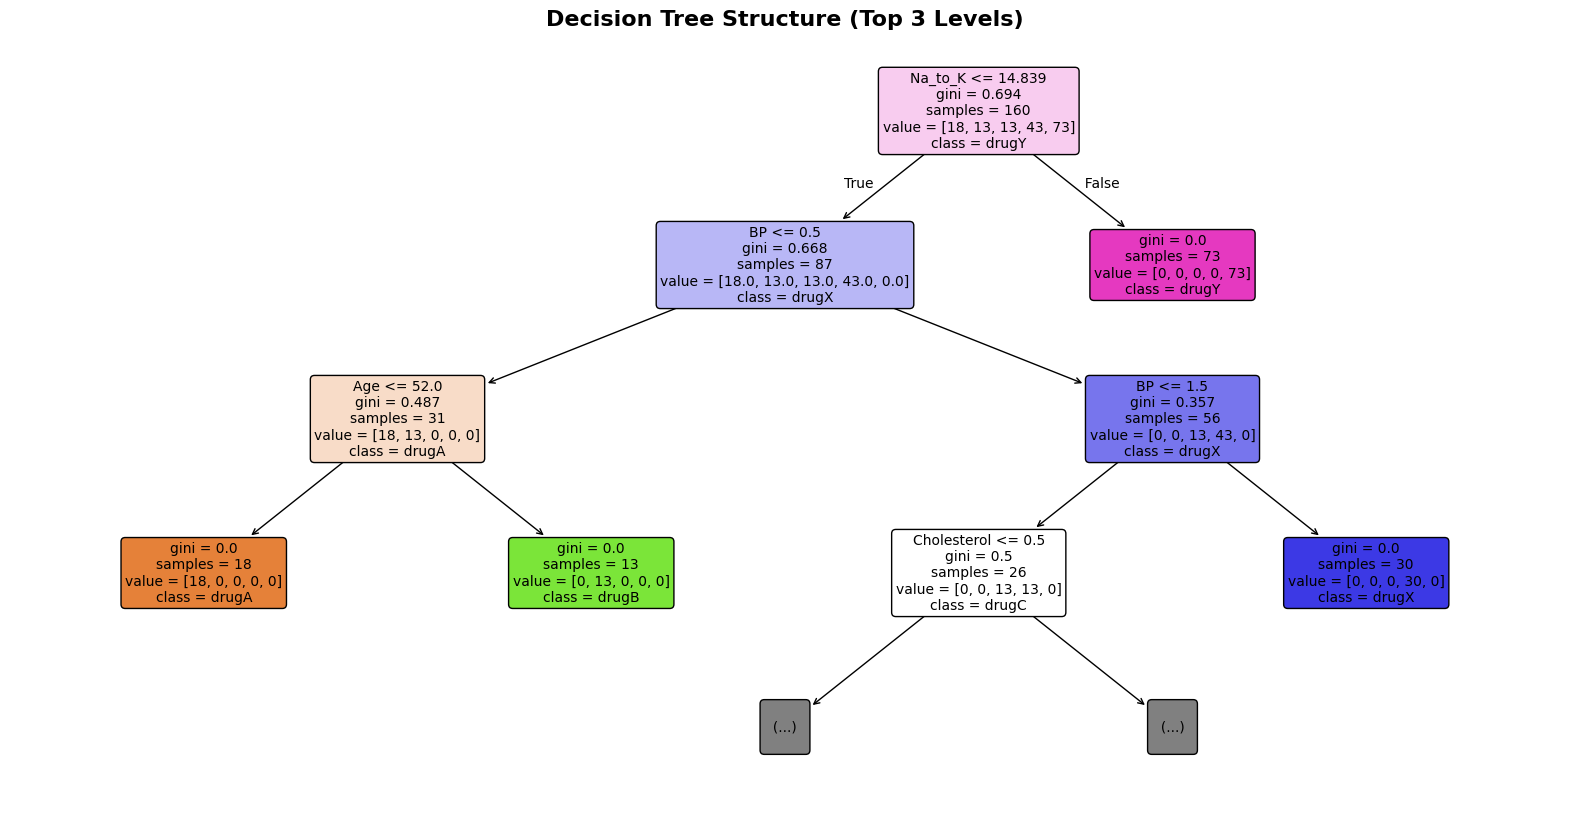


📊 Decision Tree Insights:
   • Tree depth: 4
   • Number of leaves: 6
   • Most important feature: Na_to_K


In [7]:
# Visualize the decision tree (simplified version)
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=feature_names,
          class_names=drug_labels,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Show only top 3 levels for clarity
plt.title('Decision Tree Structure (Top 3 Levels)', fontsize=16, fontweight='bold')
plt.show()

print("\n📊 Decision Tree Insights:")
print(f"   • Tree depth: {dt_model.get_depth()}")
print(f"   • Number of leaves: {dt_model.get_n_leaves()}")
print(f"   • Most important feature: {feature_names[np.argmax(importances)]}")

## Model Predictions Example

In [8]:
# Example predictions for new patients
print("=" * 50)
print("EXAMPLE PREDICTIONS FOR NEW PATIENTS")
print("=" * 50)

# Create example patients
example_patients = pd.DataFrame({
    'Age': [25, 45, 65],
    'Sex': ['M', 'F', 'M'],
    'BP': ['HIGH', 'NORMAL', 'LOW'],
    'Cholesterol': ['HIGH', 'NORMAL', 'HIGH'],
    'Na_to_K': [15.5, 10.2, 20.8]
})

# Encode the example data
example_encoded = example_patients.copy()
example_encoded['Sex_encoded'] = le_sex.transform(example_patients['Sex'])
example_encoded['BP_encoded'] = le_bp.transform(example_patients['BP'])
example_encoded['Cholesterol_encoded'] = le_chol.transform(example_patients['Cholesterol'])

# Make predictions
X_example = example_encoded[features]
predictions = dt_model.predict(X_example)
probabilities = dt_model.predict_proba(X_example)

# Display results
for i, (idx, patient) in enumerate(example_patients.iterrows()):
    print(f"\nPatient {i+1}:")
    print(f"  Age: {patient['Age']}, Sex: {patient['Sex']}, BP: {patient['BP']}")
    print(f"  Cholesterol: {patient['Cholesterol']}, Na_to_K: {patient['Na_to_K']}")
    print(f"  🎯 Predicted Drug: {predictions[i]}")
    print(f"  📊 Confidence: {max(probabilities[i]):.3f}")

EXAMPLE PREDICTIONS FOR NEW PATIENTS

Patient 1:
  Age: 25, Sex: M, BP: HIGH
  Cholesterol: HIGH, Na_to_K: 15.5
  🎯 Predicted Drug: drugY
  📊 Confidence: 1.000

Patient 2:
  Age: 45, Sex: F, BP: NORMAL
  Cholesterol: NORMAL, Na_to_K: 10.2
  🎯 Predicted Drug: drugX
  📊 Confidence: 1.000

Patient 3:
  Age: 65, Sex: M, BP: LOW
  Cholesterol: HIGH, Na_to_K: 20.8
  🎯 Predicted Drug: drugY
  📊 Confidence: 1.000


## Summary

In [10]:
print("=" * 60)
print("DECISION TREE DRUG PREDICTION SUMMARY")
print("=" * 60)
print(f"🎯 Final Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")
print(f"📊 Dataset: {len(df)} patients, 5 features, 5 drug types")
print(f"🌳 Tree Depth: {dt_model.get_depth()} levels")
print(f"🍃 Number of Leaves: {dt_model.get_n_leaves()}")

# Top features
top_feature = feature_names[np.argmax(importances)]
print(f"\n🔍 Most Important Feature: {top_feature} ({importances.max():.3f})")

# Per-drug performance
print(f"\n💊 Drug Prediction Performance:")
for i, drug in enumerate(drug_labels):
    if i < len(cm):
        drug_accuracy = cm[i, i] / cm[i, :].sum() if cm[i, :].sum() > 0 else 0
        print(f"   {drug}: {drug_accuracy:.3f} ({drug_accuracy*100:.1f}%)")


DECISION TREE DRUG PREDICTION SUMMARY
🎯 Final Accuracy: 0.9750 (97.5%)
📊 Dataset: 200 patients, 5 features, 5 drug types
🌳 Tree Depth: 4 levels
🍃 Number of Leaves: 6

🔍 Most Important Feature: Na_to_K (0.476)

💊 Drug Prediction Performance:
   drugA: 1.000 (100.0%)
   drugB: 0.667 (66.7%)
   drugC: 1.000 (100.0%)
   drugX: 1.000 (100.0%)
   drugY: 1.000 (100.0%)
